In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5_regular_season
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.classes.action_tests import ActionTest
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

In [5]:
spy = 'Calvin Schoolidge/steam'
individual_replays = list(filter(lambda g: g.spy == spy, scl5_replays))

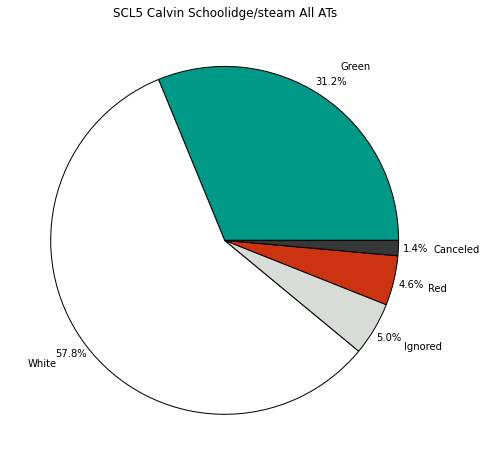

,ActionTest.Green,ActionTest.White,ActionTest.Ignored,ActionTest.Red,ActionTest.Canceled
NaN,88,163,14,13,4


In [6]:
action_test_percentages(
    individual_replays,
    axis_properties = AxisProperties(title=f'SCL5 {spy} All ATs', savefig='example_pictures/scl5_calvin_action_tests.png')
).frame

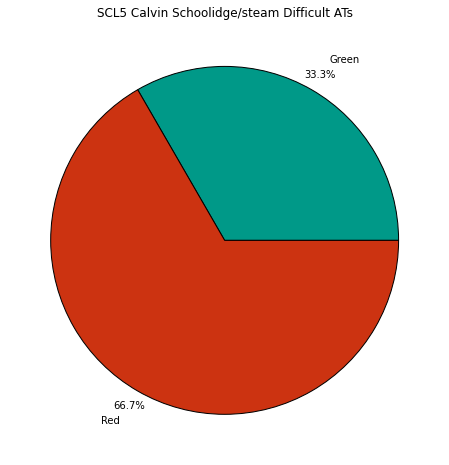

,ActionTest.Green,ActionTest.Red
NaN,2,4


In [7]:
diff_action_test_percentages(
    individual_replays,
    axis_properties = AxisProperties(title=f'SCL5 {spy} Difficult ATs')
).frame

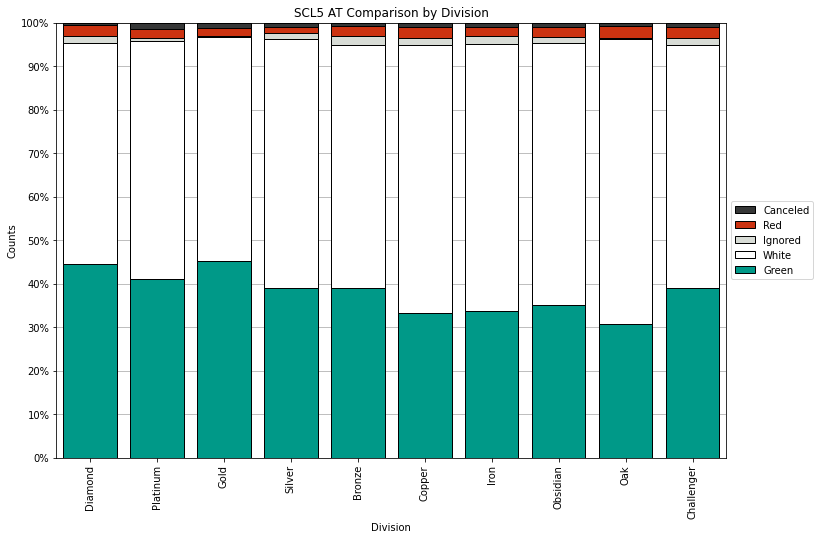

In [8]:
_=action_test_percentages(
    scl5_replays,
    axis_properties = AxisProperties(
        title='SCL5 AT Comparison by Division',
        x_axis_label='Division',
        y_axis_label='Counts'),
    data_query = DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        reverse_primary_order=True,
        percent_normalized_data=True)
)

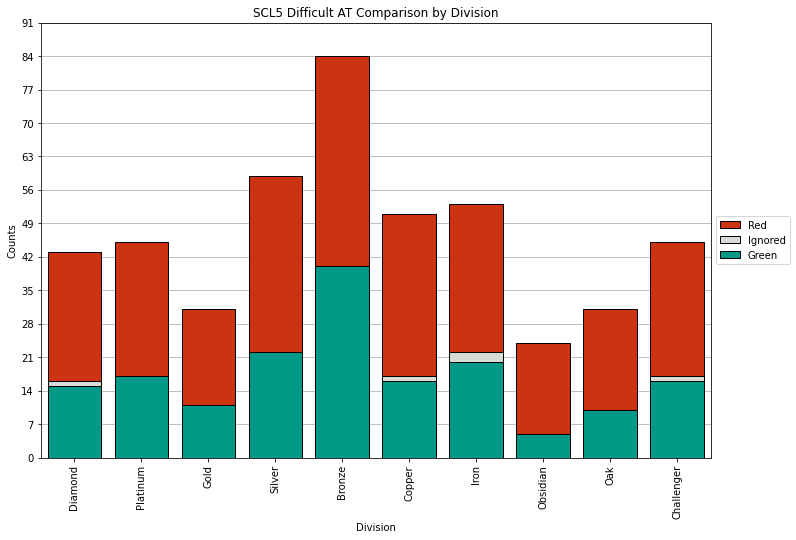

In [9]:
_=diff_action_test_percentages(
    scl5_replays,
    axis_properties = AxisProperties(
        title='SCL5 Difficult AT Comparison by Division',
        x_axis_label='Division',
        y_axis_label='Counts'),
    data_query = DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        reverse_primary_order=True)
)

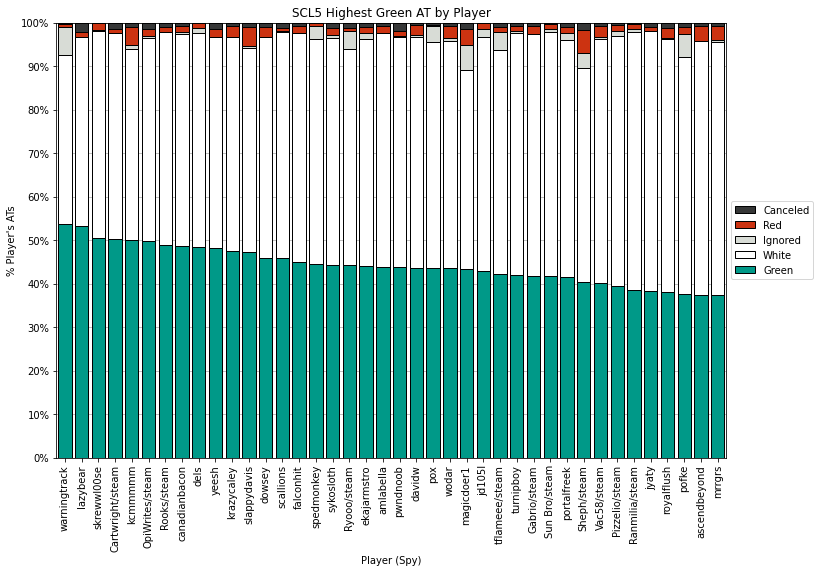

In [10]:
_=action_test_percentages(
    scl5_replays,
    axis_properties = AxisProperties(
        title='SCL5 Highest Green AT by Player',
        x_axis_label='Player (Spy)',
        y_axis_label='% Player\'s ATs',
        savefig='example_pictures/scl5_percent_action_tests.png'),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=lambda name_series: -name_series[1][ActionTest.Green],
        limit=40,
        reverse_primary_order=True,
        percent_normalized_data=True)    
)

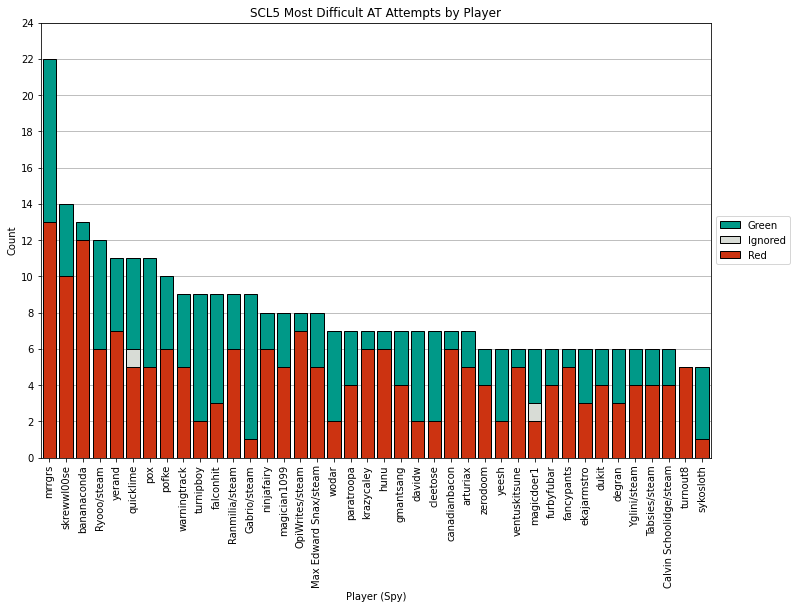

In [11]:
_=diff_action_test_percentages(
    scl5_replays,
    axis_properties = AxisProperties(
        title='SCL5 Most Difficult AT Attempts by Player',
        x_axis_label='Player (Spy)',
        y_axis_label='Count'),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sum,
        reverse_secondary_order=True,
        limit=40
    )
)